In [1]:
# Compute the derivative of N(t)
deriv_Nt(nt, K, r) = r*nt*(1-nt/K)

# Compute N(t + h)
next_Nt(nt, K, r, h) = nt + h*deriv_Nt(nt, K, r)

next_Nt (generic function with 1 method)

In [2]:
# 各種パラメータを定義
tmax = 10.0 # 終了時刻
r = 1.0 # パラメータ1
K = 10.0 #パラメータ2
N0 = 1.0 # 人口の初期値
numtimes  = 100 # 0 ≦ t < tmaxの分割数

h = tmax/numtimes

0.1

In [3]:
# 型安定性のチェック
@code_warntype deriv_Nt(N0, K, r)

MethodInstance for deriv_Nt(::Float64, ::Float64, ::Float64)
  from deriv_Nt(nt, K, r) @ Main c:\Users\kakin\home\workspace\logistic\notebook\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sZmlsZQ==.jl:2
Arguments
  #self#::Core.Const(Main.deriv_Nt)
  nt::Float64
  K::Float64
  r::Float64
Body::Float64
1 ─ %1 = Main.:*::Core.Const(*)
│   %2 = Main.:-::Core.Const(-)
│   %3 = Main.:/::Core.Const(/)
│   %4 = (%3)(nt, K)::Float64
│   %5 = (%2)(1, %4)::Float64
│   %6 = (%1)(r, nt, %5)::Float64
└──      return %6



In [5]:
@code_warntype next_Nt(N0, K, r, h)

MethodInstance for next_Nt(::Float64, ::Float64, ::Float64, ::Float64)
  from next_Nt(nt, K, r, h) @ Main c:\Users\kakin\home\workspace\logistic\notebook\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sZmlsZQ==.jl:5
Arguments
  #self#::Core.Const(Main.next_Nt)
  nt::Float64
  K::Float64
  r::Float64
  h::Float64
Body::Float64
1 ─ %1 = Main.:+::Core.Const(+)
│   %2 = Main.:*::Core.Const(*)
│   %3 = Main.deriv_Nt(nt, K, r)::Float64
│   %4 = (%2)(h, %3)::Float64
│   %5 = (%1)(nt, %4)::Float64
└──      return %5



In [6]:
results = Vector{Float64}(undef, numtimes+1)

# 初期値
results[1] = N0

# 時間発展
for t in 1:numtimes
    results[t+1] = next_Nt(results[t], K, r, h)
end

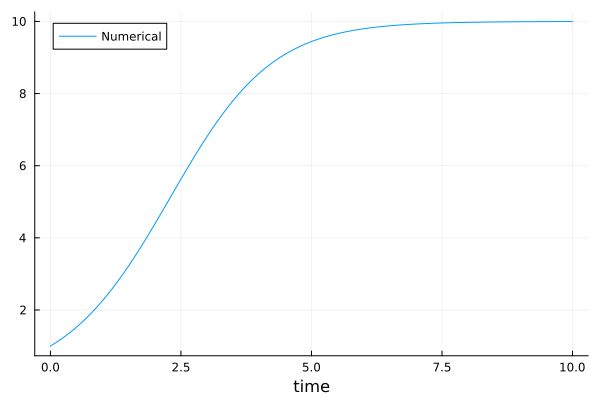

In [7]:
using Plots

times = LinRange(0, tmax, numtimes+1)

plot(times, results, label="Numerical", xlabel="time")